<a href="https://colab.research.google.com/github/bunanas-360/Colab-Files/blob/main/Checkpoint%203%20SERS/An%C3%A1lise_de_Dados_do_ONS_CP3_SERS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Membros:

Auro Vanetti (RM: 563761)

Enzo H. K. Nishida (RM: 565052)

Francisco B. N. Neto (RM: 565868)


# SOLUÇÕES EM ENERGIAS RENOVÁVEIS E SUSTENTÁVEIS
## Análise de Dados e Machine Learning em Energia

Este notebook contém cinco exercícios com base em dados públicos do **ONS (Operador Nacional do Sistema Elétrico)**.  
O objetivo é explorar, analisar e modelar dados de geração de energia no Brasil, aplicando técnicas de **Python, análise de dados e aprendizado de máquina**.

### Fonte dos dados
O dataset utilizado está disponível no portal aberto do ONS:  
[CAPACIDADE_GERACAO.csv](https://ons-aws-prod-opendata.s3.amazonaws.com/dataset/capacidade-geracao/CAPACIDADE_GERACAO.csv)

Este arquivo contém informações sobre as usinas brasileiras, incluindo:
- Tipo de geração (hidráulica, solar, eólica, térmica etc.)
- Capacidade instalada (MW)
- Data de início de operação
- Estado de localização

---



# Exercício 1 – Exploração da Matriz Energética Brasileira

### Contexto
O Brasil possui uma matriz energética diversificada. Entender a evolução da capacidade instalada por fonte é essencial para analisar a transição energética.

### Atividade
1. Carregar o dataset de capacidade de geração.  
2. Explorar as colunas e verificar os tipos de geração disponíveis.  
3. Criar gráficos de linha mostrando a evolução da capacidade instalada de cada fonte ao longo dos anos.  
4. Pergunta: Qual fonte cresceu mais nos últimos 10 anos?


In [1]:
# 1. Carregar o dataset de capacidade de geração.

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Se estiver no Colab: faça upload do arquivo CSV
from google.colab import files
print("Selecione o arquivo CSV (por exemplo Exemplo2025.csv) para upload.")
uploaded = files.upload()  # execute e escolha o arquivo

# pega o primeiro arquivo enviado
fname = list(uploaded.keys())[0]
df = pd.read_csv(fname, sep=None, engine='python', encoding='utf-8')  # sep=None tenta inferir , ou ;
df.columns = df.columns.str.strip()  # remove espaços extras nos nomes das colunas
print("Arquivo carregado:", fname)
#print("Dimensão:", df.shape)
df.head()



Selecione o arquivo CSV (por exemplo Exemplo2025.csv) para upload.


Saving CAPACIDADE_GERACAO.csv to CAPACIDADE_GERACAO (2).csv
Arquivo carregado: CAPACIDADE_GERACAO (2).csv


,id_subsistema,nom_subsistema,id_estado,nom_estado,nom_modalidadeoperacao,nom_agenteproprietario,nom_agenteoperador,nom_tipousina,nom_usina,ceg,nom_unidadegeradora,cod_equipamento,num_unidadegeradora,nom_combustivel,dat_entradateste,dat_entradaoperacao,dat_desativacao,val_potenciaefetiva
0,NE,NORDESTE,AL,ALAGOAS,TIPO I,CHESF,CHESF,HIDROELÉTRICA,XINGÓ,UHE.PH.SE.027053-9.01,UG 527 MW USINA XINGO 1 AL,ALUXG-0UG1,1,HIDRÁULICA,1997-08-22,1997-08-22,NaN,527.0
1,NE,NORDESTE,AL,ALAGOAS,TIPO I,CHESF,CHESF,HIDROELÉTRICA,XINGÓ,UHE.PH.SE.027053-9.01,UG 527 MW USINA XINGO 2 AL,ALUXG-0UG2,2,HIDRÁULICA,1996-12-20,1996-12-20,NaN,527.0
2,NE,NORDESTE,AL,ALAGOAS,TIPO I,CHESF,CHESF,HIDROELÉTRICA,XINGÓ,UHE.PH.SE.027053-9.01,UG 527 MW USINA XINGO 3 AL,ALUXG-0UG3,3,HIDRÁULICA,1996-07-31,1996-07-31,NaN,527.0
3,NE,NORDESTE,AL,ALAGOAS,TIPO I,CHESF,CHESF,HIDROELÉTRICA,XINGÓ,UHE.PH.SE.027053-9.01,UG 527 MW USINA XINGO 4 AL,ALUXG-0UG4,4,HIDRÁULICA,1995-10-26,1995-10-26,NaN,527.0
4,NE,NORDESTE,AL,ALAGOAS,TIPO I,CHESF,CHESF,HIDROELÉTRICA,XINGÓ,UHE.PH.SE.027053-9.01,UG 527 MW USINA XINGO 5 AL,ALUXG-0UG5,5,HIDRÁULICA,1995-01-31,1995-01-31,NaN,527.0


In [2]:
# 2 - Exploração das colunas e tipos de geração

print("Colunas disponíveis:\n", df.columns.tolist(), "\n")
#print("tipos de dados:\n", df.dtypes, "\n")

# verificar se a coluna de tipo de usina existe e listar categorias
type_col = 'nom_tipousina'
if type_col in df.columns:
    verify_colun = df[type_col].value_counts(dropna=False)
    print(f"Tipos de geração encontrados ({len(verify_colun)} categorias).")
    print(verify_colun.head(20))
else:
    print(f"Coluna '{type_col}' não encontrada no dataset. Verifique o nome das colunas.")


Colunas disponíveis:
 ['id_subsistema', 'nom_subsistema', 'id_estado', 'nom_estado', 'nom_modalidadeoperacao', 'nom_agenteproprietario', 'nom_agenteoperador', 'nom_tipousina', 'nom_usina', 'ceg', 'nom_unidadegeradora', 'cod_equipamento', 'num_unidadegeradora', 'nom_combustivel', 'dat_entradateste', 'dat_entradaoperacao', 'dat_desativacao', 'val_potenciaefetiva'] 

Tipos de geração encontrados (5 categorias).
nom_tipousina
EOLIELÉTRICA     2120
TÉRMICA          1463
FOTOVOLTAICA      998
HIDROELÉTRICA     819
NUCLEAR             2
Name: count, dtype: int64


Conversão de data feita. Exemplos de anos: [1997 1996 1995 1994 2002 1977 2003 1955 1961 1962]
Conversão de potência concluída. Nulos após conversão: 0


/tmp/ipython-input-3372289335.py:7: UserWarning: Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  df[data_col + '_parsed'] = pd.to_datetime(df[data_col], dayfirst=True, errors='coerce')


nom_tipousina,EOLIELÉTRICA,FOTOVOLTAICA,HIDROELÉTRICA,NUCLEAR,TÉRMICA
ano_inicio,,,,,
1924,0.0,0.0,54.711,0.0,0.0
1926,0.0,0.0,40.000,0.0,0.0
1927,0.0,0.0,35.000,0.0,0.0
1929,0.0,0.0,32.015,0.0,0.0
1936,0.0,0.0,65.000,0.0,0.0


Tabela agregada pronta: anos x fontes (MW).


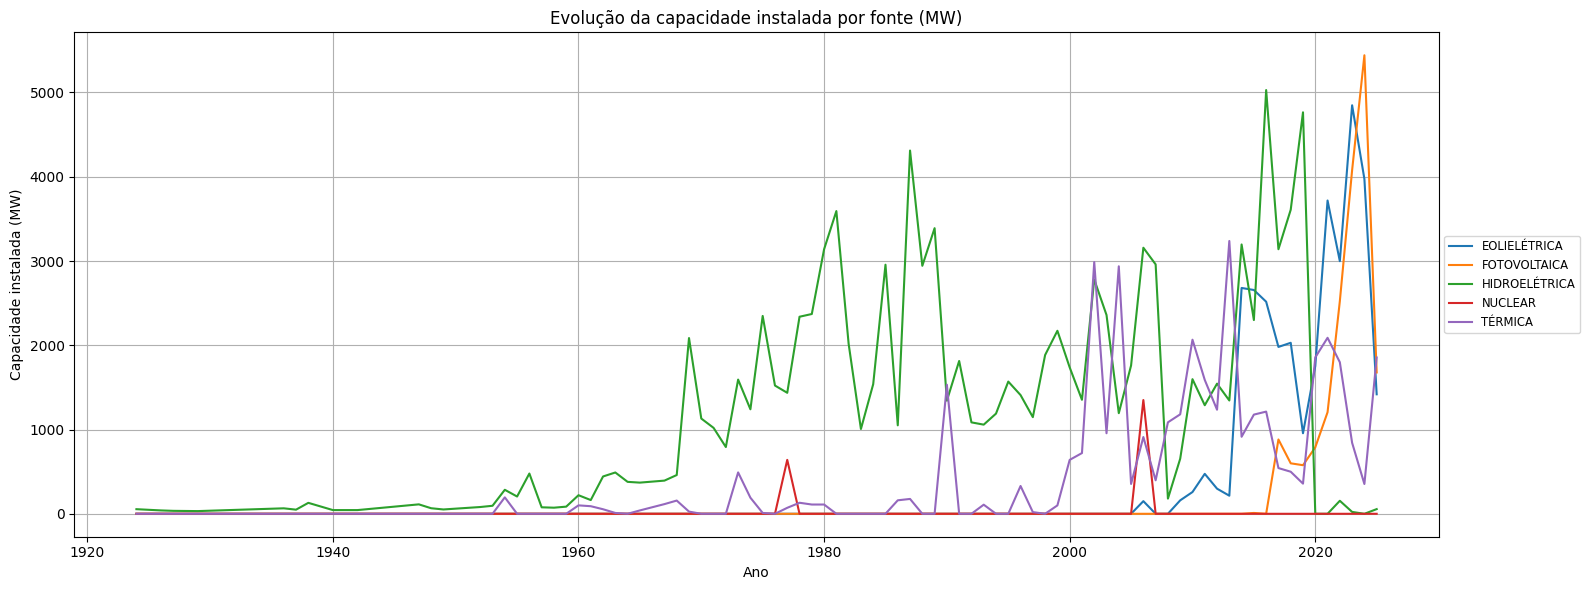

In [3]:
#nomes de colunas esperados
data_col = 'dat_entradaoperacao'
pot_col = 'val_potenciaefetiva'

#converter data
if data_col in df.columns:
    df[data_col + '_parsed'] = pd.to_datetime(df[data_col], dayfirst=True, errors='coerce')
    df['ano_inicio'] = df[data_col + '_parsed'].dt.year
    print("Conversão de data feita. Exemplos de anos:", df['ano_inicio'].dropna().unique()[:10])
else:
    print(f"Coluna de data '{data_col}' não encontrada.")

#converter potência para numérico de forma robusta
if pot_col in df.columns:
    #tentativa direta
    df[pot_col + '_num'] = pd.to_numeric(df[pot_col], errors='coerce')

    #se muitos valores ficaram NaN
    num_vazio = df[pot_col + '_num'].isna().sum()
    if num_vazio > 0.2 * len(df):  # se mais de 20% nulos, tentar outra conversão
        tmp = df[pot_col].astype(str).str.replace('.', '', regex=False).str.replace(',', '.', regex=False)
        df[pot_col + '_num'] = pd.to_numeric(tmp, errors='coerce')
    print("Conversão de potência concluída. Nulos após conversão:", df[pot_col + '_num'].isna().sum())
else:
    print(f"Coluna de potência '{pot_col}' não encontrada.")


#agrupar por ano e por tipo de usina
group_cols = ['ano_inicio', 'nom_tipousina']
if 'ano_inicio' in df.columns and 'nom_tipousina' in df.columns and pot_col + '_num' in df.columns:
    agg = df.groupby(group_cols, as_index=False)[pot_col + '_num'].sum()
    #criar pivot (linhas = anos, colunas = fontes)
    pivot = agg.pivot(index='ano_inicio', columns='nom_tipousina', values=pot_col + '_num').fillna(0)
    pivot = pivot.sort_index()
    display(pivot.head())  #mostra as primeiras linhas da tabela agregada
    print("Tabela agregada pronta: anos x fontes (MW).")
else:
    print("Alguma coluna necessária não está presente (ano_inicio, nom_tipousina, val_potenciaefetiva_num).")

#3. Plotar graficos

plt.figure(figsize=(16,6))
for col in pivot.columns:
    plt.plot(pivot.index, pivot[col], label=col)

plt.xlabel('Ano')
plt.ylabel('Capacidade instalada (MW)')
plt.title('Evolução da capacidade instalada por fonte (MW)')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), fontsize='small')  # legenda fora do gráfico
plt.grid(True)
plt.tight_layout()
plt.show()



**4. Pergunta: Qual fonte cresceu mais nos últimos 10 anos?**

Resposta: Fotovoltaica


# Exercício 2 – Correlação entre Capacidade e Localização

### Contexto
A localização influencia o tipo de geração de energia (ex.: eólica no Nordeste, solar no Sudeste/Centro-Oeste, hidráulica no Norte).

### Atividade
1. Agrupar os dados por estado e tipo de geração.  
2. Montar gráficos de barras comparando a distribuição das fontes por estado.  
3. Calcular a participação percentual de cada fonte em cada estado.  
4. Pergunta: Quais estados são líderes em energia solar e eólica?


In [4]:
#carregando dados csv
import pandas as pd
import matplotlib.pyplot as plt

from google.colab import files
print("Selecione novamente o arquivo EXEMPLO.csv se ainda não estiver carregado.")
uploaded = files.upload()
fname = list(uploaded.keys())[0]

df = pd.read_csv(fname, sep=None, engine='python', encoding='utf-8')
df.columns = df.columns.str.strip()

# converter data e potência
df['dat_entradaoperacao'] = pd.to_datetime(df['dat_entradaoperacao'], dayfirst=True, errors='coerce')
df['val_potenciaefetiva_num'] = pd.to_numeric(df['val_potenciaefetiva'], errors='coerce')

# valid colunas
print(df.columns)
df.head()

#1. Agrupar por estado e tipo de usina
agrupado = (
    df.groupby(['nom_estado', 'nom_tipousina'], as_index=False)['val_potenciaefetiva_num']
    .sum()
)
print("Tabela agrupada por estado e tipo de geração:")
display(agrupado.head(10))


Selecione novamente o arquivo EXEMPLO.csv se ainda não estiver carregado.


Saving CAPACIDADE_GERACAO.csv to CAPACIDADE_GERACAO (3).csv
Index(['id_subsistema', 'nom_subsistema', 'id_estado', 'nom_estado',
       'nom_modalidadeoperacao', 'nom_agenteproprietario',
       'nom_agenteoperador', 'nom_tipousina', 'nom_usina', 'ceg',
       'nom_unidadegeradora', 'cod_equipamento', 'num_unidadegeradora',
       'nom_combustivel', 'dat_entradateste', 'dat_entradaoperacao',
       'dat_desativacao', 'val_potenciaefetiva', 'val_potenciaefetiva_num'],
      dtype='object')
Tabela agrupada por estado e tipo de geração:


/tmp/ipython-input-1027713305.py:14: UserWarning: Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  df['dat_entradaoperacao'] = pd.to_datetime(df['dat_entradaoperacao'], dayfirst=True, errors='coerce')


,nom_estado,nom_tipousina,val_potenciaefetiva_num
0,ACRE,TÉRMICA,89.3360
1,ALAGOAS,HIDROELÉTRICA,3162.0000
2,ALAGOAS,TÉRMICA,209.1200
3,AMAPA,HIDROELÉTRICA,941.9500
4,AMAPA,TÉRMICA,198.4800
5,AMAZONAS,HIDROELÉTRICA,250.0000
6,AMAZONAS,TÉRMICA,2061.7460
7,BAHIA,EOLIELÉTRICA,11440.0500
8,BAHIA,FOTOVOLTAICA,2318.9836
9,BAHIA,HIDROELÉTRICA,5951.9110


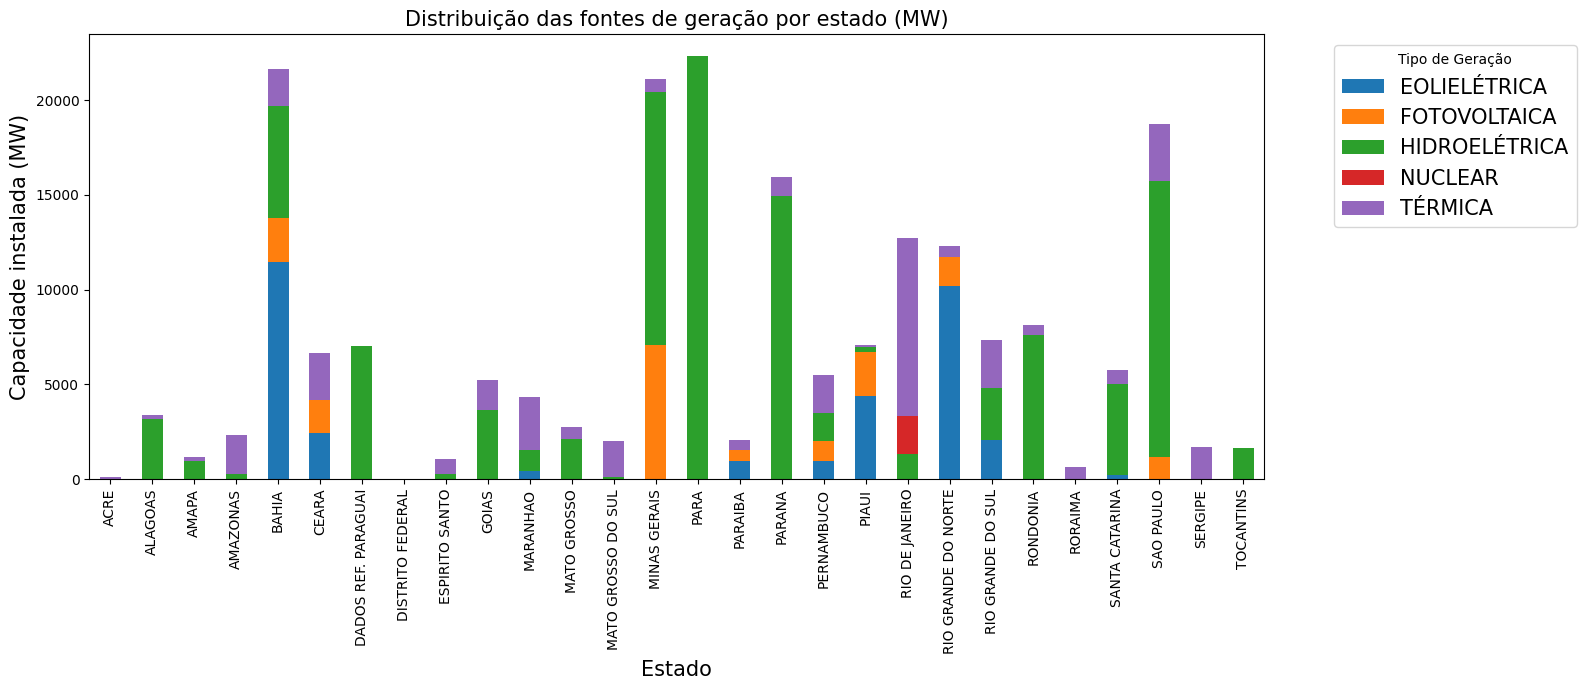

In [5]:
# 2. Montar gráficos de barras comparando a distribuição das fontes por estado e tipos.
pivot_estados = agrupado.pivot(index='nom_estado', columns='nom_tipousina', values='val_potenciaefetiva_num').fillna(0)

# Plotar gráfico
pivot_estados.plot(kind='bar', stacked=True, figsize=(16,7))

plt.title('Distribuição das fontes de geração por estado (MW)', fontsize='15')
plt.xlabel('Estado', fontsize='15')
plt.ylabel('Capacidade instalada (MW)', fontsize='15')
plt.legend(title='Tipo de Geração', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='15')
plt.tight_layout()
plt.show()

In [6]:
# 3. Calcular a participação percentual de cada fonte em cada estado.
pivot_percentual = pivot_estados.div(pivot_estados.sum(axis=1), axis=0) * 100

print("Participação percentual das fontes em cada estado:")
display(pivot_percentual.round(2).head(10))


Participação percentual das fontes em cada estado:


nom_tipousina,EOLIELÉTRICA,FOTOVOLTAICA,HIDROELÉTRICA,NUCLEAR,TÉRMICA
nom_estado,,,,,
ACRE,0.00,0.00,0.00,0.0,100.00
ALAGOAS,0.00,0.00,93.80,0.0,6.20
AMAPA,0.00,0.00,82.60,0.0,17.40
AMAZONAS,0.00,0.00,10.81,0.0,89.19
BAHIA,52.81,10.70,27.47,0.0,9.02
CEARA,36.60,26.22,0.00,0.0,37.18
DADOS REF. PARAGUAI,0.00,0.00,100.00,0.0,0.00
DISTRITO FEDERAL,0.00,0.00,0.00,0.0,100.00
ESPIRITO SANTO,0.00,0.00,26.59,0.0,73.41


In [7]:
# 4. Calcular a participação percentual de cada fonte em cada estado.

solar = agrupado[agrupado['nom_tipousina'].str.contains('FOTOVOLTAICA', case=False, na=False)]
eolica = agrupado[agrupado['nom_tipousina'].str.contains('EOLIELÉTRICA', case=False, na=False)]

estado_solar_top = solar.loc[solar['val_potenciaefetiva_num'].idxmax()]
estado_eolica_top = eolica.loc[eolica['val_potenciaefetiva_num'].idxmax()]

print("Estado líder em Eergia solar:")
print(f"→ {estado_solar_top['nom_estado']} com {estado_solar_top['val_potenciaefetiva_num']:.2f} MW")

print("\nEstado líder em energia Eólica:")
print(f"→ {estado_eolica_top['nom_estado']} com {estado_eolica_top['val_potenciaefetiva_num']:.2f} MW")

Estado líder em Eergia solar:
→ MINAS GERAIS com 7070.80 MW

Estado líder em energia Eólica:
→ BAHIA com 11440.05 MW



# Exercício 3 – Previsão de Crescimento da Capacidade Solar

### Contexto
A energia solar tem crescido exponencialmente no Brasil. Podemos usar aprendizado de máquina para prever a capacidade futura.

### Atividade
1. Filtrar os dados apenas para usinas solares.  
2. Criar uma série temporal da capacidade instalada por ano.  
3. Aplicar um modelo de regressão (LinearRegression ou RandomForestRegressor).  
4. Fazer previsões para os próximos 5 anos.  
5. Pergunta: O modelo indica crescimento linear ou exponencial?


In [8]:
# 1. Filtrar os dados apenas para usinas solares.

# Criar dataframe com só usinas solares
df_solar = df[df['nom_tipousina'].str.contains('FOTOVOLTAICA', case=False, na=False)]

# Resultado
print(df_solar.head())

     id_subsistema nom_subsistema id_estado nom_estado nom_modalidadeoperacao  \
2124            NE       NORDESTE        CE      CEARA              TIPO II-B   
2125            NE       NORDESTE        CE      CEARA              TIPO II-B   
2126            NE       NORDESTE        CE      CEARA              TIPO II-B   
2127            NE       NORDESTE        CE      CEARA              TIPO II-B   
2128            NE       NORDESTE        CE      CEARA              TIPO II-B   

     nom_agenteproprietario nom_agenteoperador nom_tipousina  \
2124                ALIANÇA           VOLTALIA  FOTOVOLTAICA   
2125         UFV PITOMBEIRA         AF ENERGIA  FOTOVOLTAICA   
2126         UFV PITOMBEIRA         AF ENERGIA  FOTOVOLTAICA   
2127         UFV PITOMBEIRA         AF ENERGIA  FOTOVOLTAICA   
2128         UFV PITOMBEIRA         AF ENERGIA  FOTOVOLTAICA   

              nom_usina                    ceg  \
2124  FLOR DE MANDACARU  UFV.RS.CE.047255-7.01   
2125         PITOMBEIRA  UFV

In [9]:
# 2. Criar uma série temporal da capacidade instalada por ano.

# Converter a coluna de data para o tipo datetime
df_solar['dat_entradaoperacao'] = pd.to_datetime(df_solar['dat_entradaoperacao'], errors='coerce')

# Criar uma coluna com o ano de entrada em operação
df_solar['ano_entrada'] = df_solar['dat_entradaoperacao'].dt.year

# Agrupar por ano e somar a capacidade instalada
serie_temporal = df_solar.groupby('ano_entrada')['val_potenciaefetiva'].sum()

# Mostrar a série temporal
print(serie_temporal)

ano_entrada
2015      10.000000
2017     882.000000
2018     599.040000
2019     576.760000
2020     788.775333
2021    1205.485000
2022    2523.271480
2023    4078.182800
2024    5441.837540
2025    1677.686180
Name: val_potenciaefetiva, dtype: float64


/tmp/ipython-input-4050455182.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_solar['dat_entradaoperacao'] = pd.to_datetime(df_solar['dat_entradaoperacao'], errors='coerce')
/tmp/ipython-input-4050455182.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_solar['ano_entrada'] = df_solar['dat_entradaoperacao'].dt.year


Coeficiente angular (tendência anual): 401.06
Intercepto: -808531.15


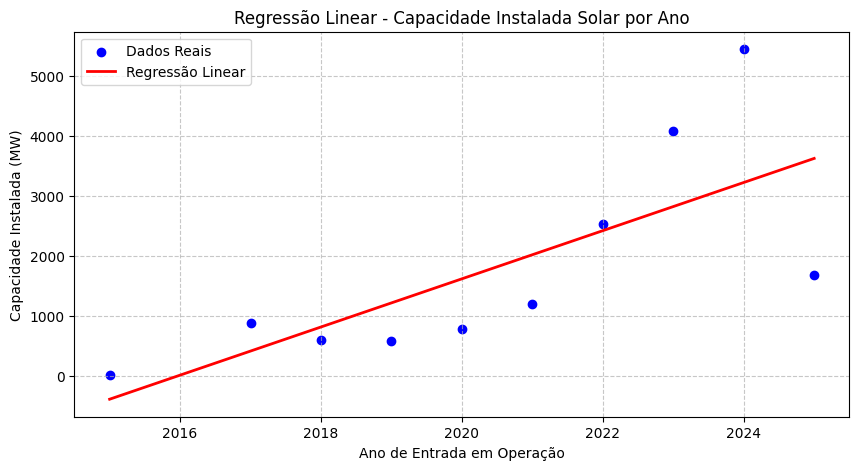

In [10]:
# 3. Aplicar um modelo de regressão (LinearRegression ou RandomForestRegressor).
from sklearn.linear_model import LinearRegression
import numpy as np

# Preparar os dados para o modelo
X = serie_temporal.index.values.reshape(-1, 1)   # anos (variável independente)
y = serie_temporal.values                        # capacidade instalada (variável dependente)

# Criar e treinar o modelo de regressão linear
modelo = LinearRegression()
modelo.fit(X, y)

# Fazer previsões
y_pred = modelo.predict(X)

# Mostrar coeficientes do modelo
print(f"Coeficiente angular (tendência anual): {modelo.coef_[0]:.2f}")
print(f"Intercepto: {modelo.intercept_:.2f}")

# Plotar os resultados
plt.figure(figsize=(10,5))
plt.scatter(X, y, color='blue', label='Dados Reais')
plt.plot(X, y_pred, color='red', linewidth=2, label='Regressão Linear')
plt.title('Regressão Linear - Capacidade Instalada Solar por Ano')
plt.xlabel('Ano de Entrada em Operação')
plt.ylabel('Capacidade Instalada (MW)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


Previsões para os próximos 5 anos:
    Ano  Previsao_Capacidade_MW
0  2026             4024.261536
1  2027             4425.325411
2  2028             4826.389286
3  2029             5227.453162
4  2030             5628.517037


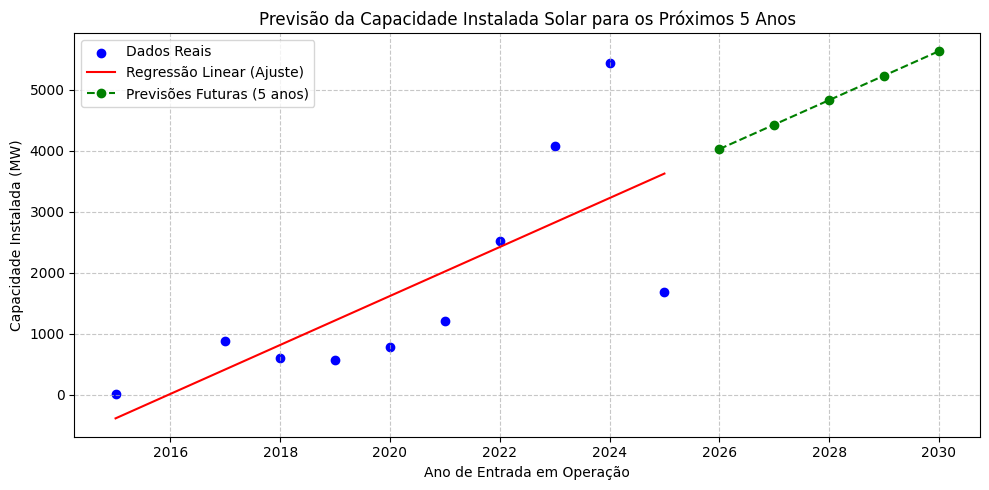

In [11]:
# 4. Fazer previsões para os próximos 5 anos.

# Gerar anos futuros (5 anos a partir do último)
ultimo_ano = int(X.max())
anos_futuros = np.arange(ultimo_ano + 1, ultimo_ano + 6).reshape(-1, 1)

# Fazer previsões futuras
previsoes_futuras = modelo.predict(anos_futuros)

# Criar DataFrame com previsões
df_previsoes = pd.DataFrame({
    'Ano': anos_futuros.flatten(),
    'Previsao_Capacidade_MW': previsoes_futuras
})
print("\nPrevisões para os próximos 5 anos:")
print(df_previsoes)

# Plotar gráfico com dados reais e previsões
plt.figure(figsize=(10,5))
plt.scatter(X, y, color='blue', label='Dados Reais')
plt.plot(X, y_pred, color='red', label='Regressão Linear (Ajuste)')
plt.plot(anos_futuros, previsoes_futuras, color='green', linestyle='--', marker='o', label='Previsões Futuras (5 anos)')
plt.title('Previsão da Capacidade Instalada Solar para os Próximos 5 Anos')
plt.xlabel('Ano de Entrada em Operação')
plt.ylabel('Capacidade Instalada (MW)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**5. Pergunta: O modelo indica crescimento linear ou exponencial?**

Resposta: Linear


# Exercício 4 – Classificação de Usinas por Fonte

### Contexto
Podemos treinar um modelo de classificação para prever o tipo de geração de uma usina a partir de suas características.

### Atividade
1. Usar variáveis como capacidade, estado, data de operação.  
2. Dividir os dados em treino/teste.  
3. Treinar um modelo de classificação (Decision Tree ou Random Forest).  
4. Avaliar a acurácia do modelo.  
5. Pergunta: Quais variáveis mais influenciam na classificação de uma usina?


In [12]:
# 1. Usar variáveis como capacidade, estado, data de operação.
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


# Selecionar apenas as colunas úteis
dados = df[['nom_estado', 'dat_entradaoperacao', 'val_potenciaefetiva', 'nom_tipousina']].copy()

# Remover linhas com valores ausentes
dados = dados.dropna(subset=['dat_entradaoperacao', 'val_potenciaefetiva', 'nom_tipousina'])

# Converter data para ano (inteiro)
dados['dat_entradaoperacao'] = pd.to_datetime(dados['dat_entradaoperacao'], errors='coerce')
dados['ano_operacao'] = dados['dat_entradaoperacao'].dt.year

# Substituir possíveis NaNs após conversão
dados = dados.dropna(subset=['ano_operacao'])

# Codificar variáveis categóricas
label_estado = LabelEncoder()
label_tipo = LabelEncoder()

dados['estado_cod'] = label_estado.fit_transform(dados['nom_estado'])
dados['tipo_cod'] = label_tipo.fit_transform(dados['nom_tipousina'])

# Definir X (variáveis explicativas) e y (alvo)
X = dados[['estado_cod', 'val_potenciaefetiva', 'ano_operacao']]
y = dados['tipo_cod']

In [13]:
# 2. Dividir os dados em treino/teste.

# Dividir em treino e teste (70% treino, 30% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [14]:
# 3. Treinar um modelo de classificação (Decision Tree ou Random Forest).

# Treinar modelo
modelo = RandomForestClassifier(random_state=42)
modelo.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [15]:
# 4. Avaliar a acurácia do modelo.

# Fazer previsões
y_pred = modelo.predict(X_test)

# Avaliar desempenho
acuracia = accuracy_score(y_test, y_pred)
print(f"Acurácia do modelo: {acuracia:.2f}")

print("\nRelatório de classificação:")
print(classification_report(y_test, y_pred, target_names=label_tipo.classes_))

Acurácia do modelo: 0.96

Relatório de classificação:
               precision    recall  f1-score   support

 EOLIELÉTRICA       0.97      0.97      0.97       621
 FOTOVOLTAICA       0.93      0.94      0.93       295
HIDROELÉTRICA       0.94      0.95      0.95       235
      NUCLEAR       0.00      0.00      0.00         1
      TÉRMICA       0.97      0.96      0.96       469

     accuracy                           0.96      1621
    macro avg       0.76      0.76      0.76      1621
 weighted avg       0.96      0.96      0.96      1621



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


**5. Pergunta: Quais variáveis mais influenciam na classificação de uma usina?**

Resposta: val_potenciaefetiva, ano_operacao e estado_cod


# Exercício 5 – Agrupamento de Usinas por Perfil

### Contexto
Usinas podem ser agrupadas de acordo com sua capacidade, região e tipo de geração, revelando padrões na matriz elétrica.

### Atividade
1. Selecionar variáveis numéricas (capacidade, ano de operação, latitude/longitude se disponíveis).  
2. Aplicar o algoritmo de clusterização K-Means.  
3. Visualizar os clusters em gráfico de dispersão.  
4. Pergunta: Cada grupo representa qual perfil de usinas (pequenas solares, grandes hidráulicas, etc.)?


In [16]:
# 1. Selecionar variáveis numéricas (capacidade, ano de operação, latitude/longitude se disponíveis).
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Converter a data de entrada em operação para ano
df['dat_entradaoperacao'] = pd.to_datetime(df['dat_entradaoperacao'], errors='coerce')
df['ano_operacao'] = df['dat_entradaoperacao'].dt.year

# Manter apenas as linhas com valores válidos
df_num = df[['val_potenciaefetiva', 'ano_operacao']].dropna()

In [17]:
# 2. Aplicar o algoritmo de clusterização K-Means.

# 5. Padronizar os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_num)

# 6. Aplicar o algoritmo K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
df_num['cluster'] = kmeans.fit_predict(X_scaled)

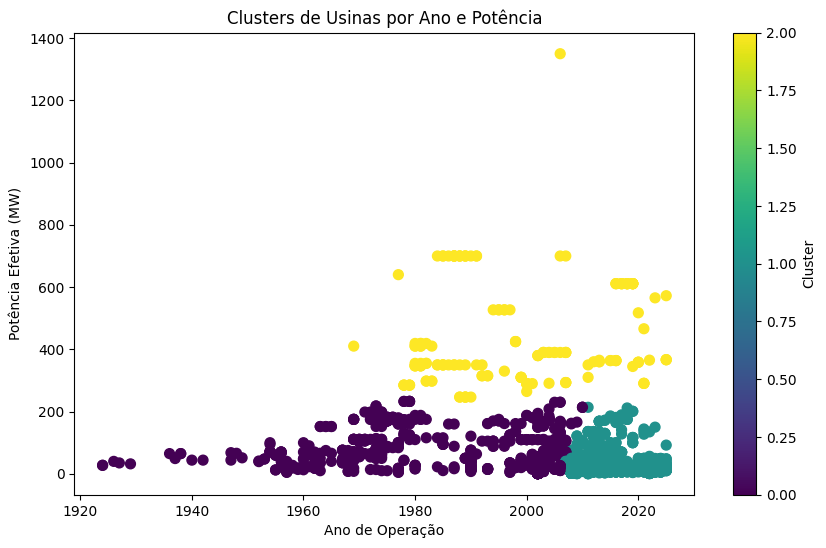

In [18]:
# 3. Visualizar os clusters em gráfico de dispersão.

plt.figure(figsize=(10, 6))
plt.scatter(df_num['ano_operacao'], df_num['val_potenciaefetiva'],
            c=df_num['cluster'], cmap='viridis', s=50)
plt.xlabel('Ano de Operação')
plt.ylabel('Potência Efetiva (MW)')
plt.title('Clusters de Usinas por Ano e Potência')
plt.colorbar(label='Cluster')
plt.show()

In [19]:
# 4. Pergunta: Cada grupo representa qual perfil de usinas (pequenas solares, grandes hidráulicas, etc.)?

# Criando dataframe com clusters
clusters = kmeans.fit_predict(X_scaled)
df_num = df
df_num['cluster'] = clusters

# Agrupar por cluster e tipo de usina
cluster_tipos = df_num.groupby(['cluster', 'nom_tipousina']).size().unstack(fill_value=0)

# Mostrar distribuição
print(cluster_tipos)

nom_tipousina  EOLIELÉTRICA  FOTOVOLTAICA  HIDROELÉTRICA  NUCLEAR  TÉRMICA
cluster                                                                   
0                         6             0            422        0      900
1                      2114           998            267        0      539
2                         0             0            130        2       24


**4. Pergunta: Cada grupo representa qual perfil de usinas (pequenas solares, grandes hidráulicas, etc.)?**

Resposta:

Cluster 0: A maioria são hidrelétricas e térmicas de porte médio.

Cluster 1: Principalmente pequenas e médias renováveis eólicas e solares, algumas hidrelétricas e térmicas pequenas.

Cluster 2: Grandes hidrelétricas e poucas térmicas e nucleares.


# Entrega Final

Cada exercício deve ser entregue em notebook final, vinculado a um repositório do GitHub.  
O relatório final deve conter:
- Código comentado  
- Gráficos e tabelas  
- Respostas às perguntas interpretativas
